### UNIVERSIDAD MAYOR DE SAN ANDRES
### FACULTADAD DE CIENCIAS PURAS Y NATURALES
### CARRERA DE INFORMATICA

**Nombre:** Gedeon Alejo Aruni

**Dococente:** Moeses Silva

**Materia:** Inf-354 Inteligencia Artificial

**Tema:** Examen Final II/2020


#                          Datos bursátiles del S&P 500

### Datos bursátiles históricos de todas las empresas actuales del S&P 500

**INTRODUCCION**

Los datos del mercado de valores pueden ser interesantes de analizar y como incentivo adicional, los modelos
predictivos sólidos pueden tener grandes beneficios financieros. La cantidad de datos financieros en la web
parece no tener fin. Un conjunto de datos grande y bien estructurado sobre una amplia gama de empresas
puede ser difícil de conseguir. Aquí proporciono un conjunto de datos con precios de acciones históricos
(últimos 5 años) para todas las empresas que se encuentran actualmente en el índice S&P 500.

**CONTENIDO**

Los datos se presentan en un par de formatos para adaptarse a las necesidades o limitaciones computacionales de diferentes individuos. He incluido archivos que contienen 5 años de datos de stock.

La carpeta individual_stocks_5yr contiene archivos de datos para acciones individuales, etiquetados por su nombre de cotización de acciones. All_stocks_5yr.csv contiene los mismos datos de todas las empresas.

Todos los archivos tienen las siguientes columnas:

Fecha(**Date**) - en formato: aa-mm-dd 

Apertura (**Open**): precio de la acción en la apertura del mercado (estos son datos de NYSE, por lo que todo en USD)

Alto(**High** ): precio más alto alcanzado en el día Cierre.

Cierre(**Close**): precio de la acción en el cierre del mercado

bajo(**Low**): precio más bajo alcanzado en el día

Volumen(**Volume**): número de acciones negociadas

Nombre(**Name**): el nombre de cotización de la acción


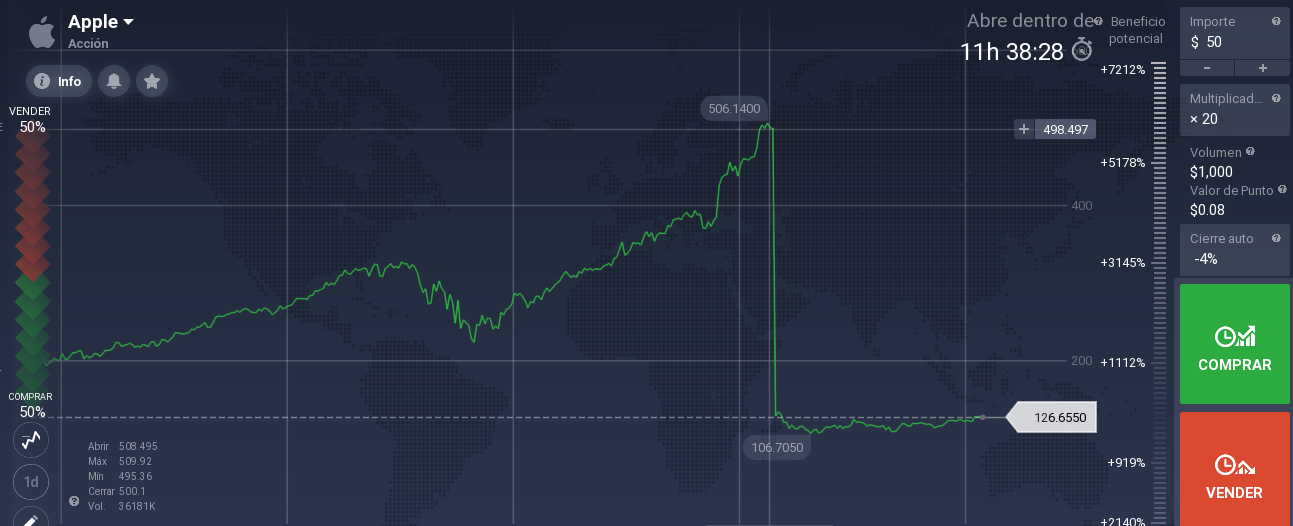

In [1]:
# Importamos todas las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Usando datos de las acciones de Apple.
df = pd.read_csv('D:\Carrera\INTELIGENCIA ARTIFICIAL\individual_stocks_5yr/AAPL_data.csv') 

In [3]:
df

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
...,...,...,...,...,...,...,...
1254,2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787,AAPL
1255,2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825,AAPL
1256,2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522,AAPL
1257,2018-02-06,154.8300,163.7200,154.0000,163.0300,68243838,AAPL


In [4]:
#df.info()


In [5]:
df.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,109.055429,109.951118,108.141589,109.066698,5.404790e+07
std,30.549220,30.686186,30.376224,30.556812,3.346835e+07
min,55.424200,57.085700,55.014200,55.789900,1.147592e+07
25%,84.647800,85.334950,84.250650,84.830650,2.969438e+07
50%,108.970000,110.030000,108.050000,109.010000,4.566893e+07
75%,127.335000,128.100000,126.290000,127.120000,6.870872e+07
max,179.370000,180.100000,178.250000,179.260000,2.668336e+08


In [6]:
#df.shape
#df.tail()

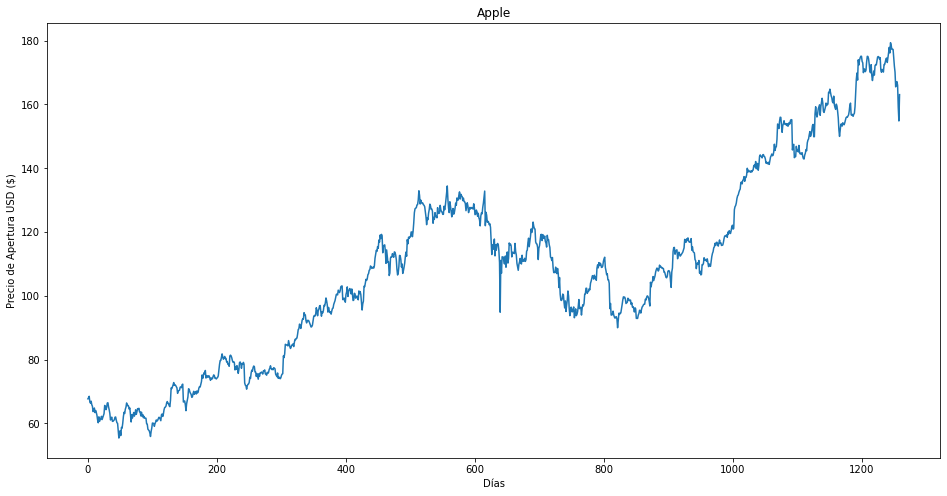

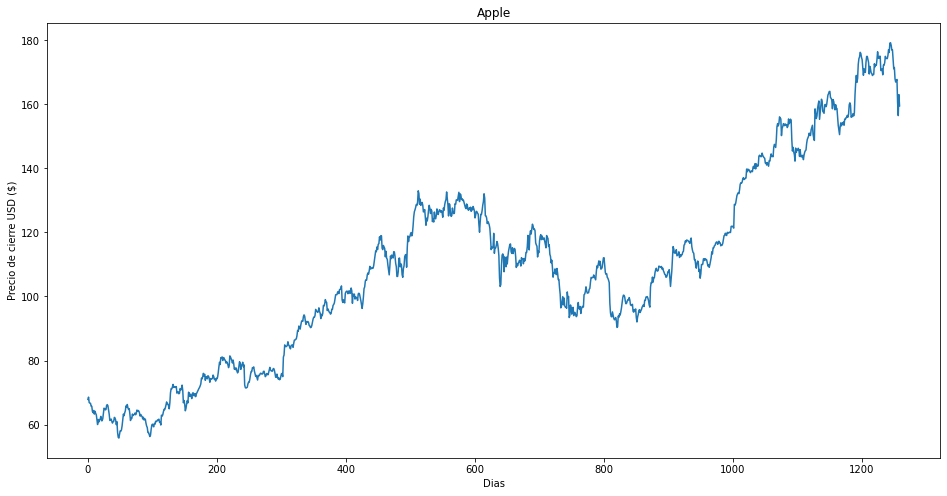

In [7]:
# Apertura de precio del dia.
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Días')
plt.ylabel('Precio de Apertura USD ($)')
plt.plot(df['open'])
#plt.show()
# precio de cierre
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Dias')
plt.ylabel('Precio de cierre USD ($)')
plt.plot(df['close'])
#plt.show()

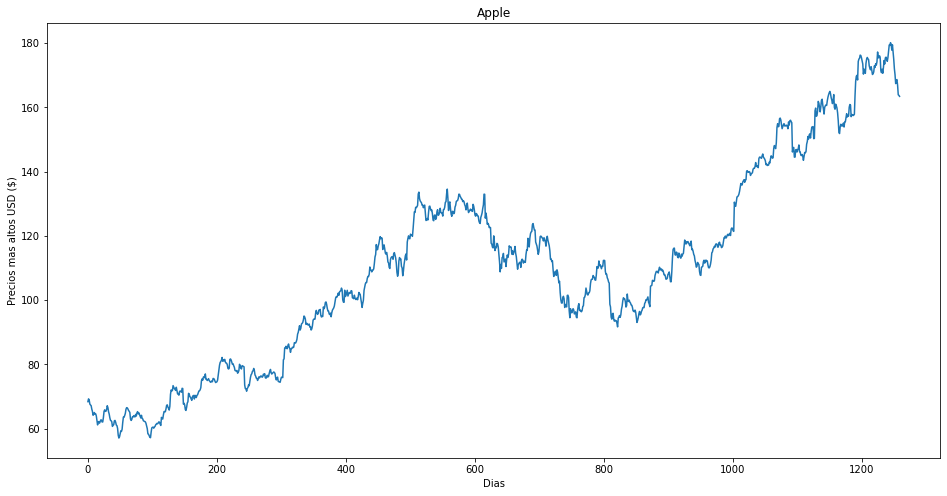

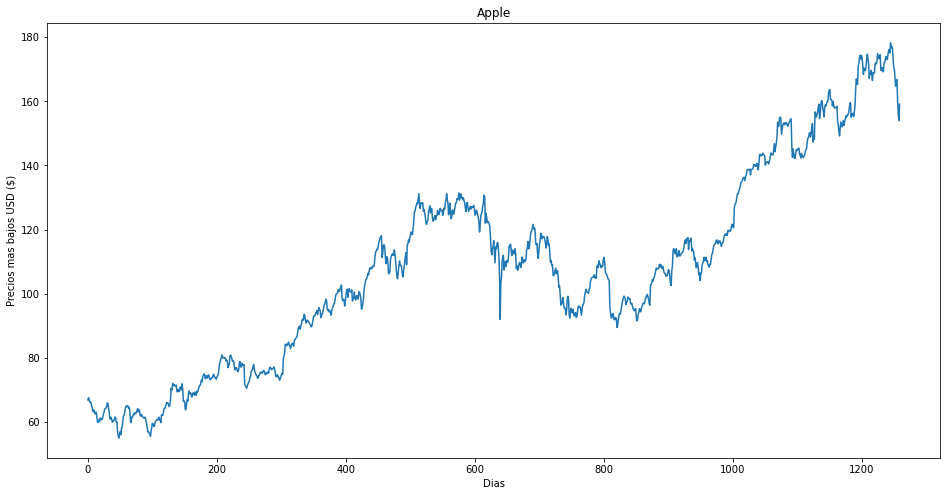

In [8]:
# Precios mas altos
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Dias')
plt.ylabel('Precios mas altos USD ($)')
plt.plot(df['high'])
#plt.show()
# Precios mas bajos.
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Dias')
plt.ylabel('Precios mas bajos USD ($)')
plt.plot(df['low'])
#plt.show()

In [9]:
df2 = df['close']
df2.tail()

1254    167.78
1255    160.50
1256    156.49
1257    163.03
1258    159.54
Name: close, dtype: float64

In [10]:
df2 = pd.DataFrame(df2)   

In [11]:
#df2

In [12]:
##df2.tail()

In [13]:
# Predicción dentro de 30 días.
future_days = 100
df2['Prediction'] = df2['close'].shift(-future_days)

In [14]:
#df2.tail()

In [15]:
X = np.array(df2.drop(['Prediction'], 1))[:-future_days]
print(X)

[[ 67.8542]
 [ 68.5614]
 [ 66.8428]
 ...
 [160.86  ]
 [159.65  ]
 [158.28  ]]


In [16]:
y = np.array(df2['Prediction'])[:-future_days]
print(y)

[ 60.1142  59.6314  59.2928 ... 156.49   163.03   159.54  ]


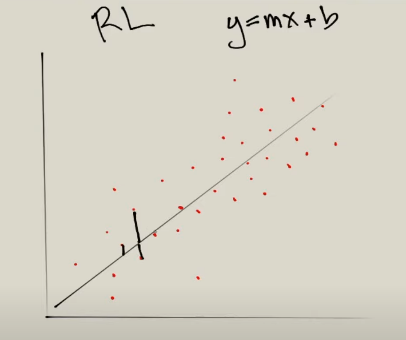 


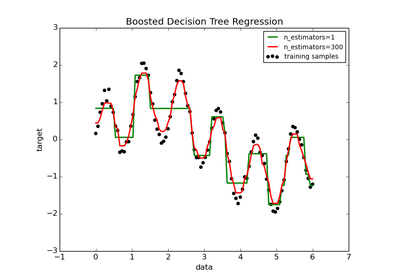

# Regresión lineal y de árbol de decisión

Como se podra ver anteriormente tenemos datos vacios pertenecen a la columna prediccion. La cual llenarmos por Regrsion Linal y Albol de decision

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [18]:
# Vamos a entrenar nuestros datos con split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
#print(x_train,y_train)

In [19]:
# Implementación de algoritmos de regresión lineal y de árbol de decisión.
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [20]:
lr = LinearRegression()
lr.fit(X_train, y_train)
x_future = df2.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[144.53],
       [143.68],
       [143.79],
       [143.65],
       [146.58],
       [147.51],
       [147.06],
       [146.53],
       [148.96],
       [153.01],
       [153.99],
       [153.26],
       [153.95],
       [156.1 ],
       [155.7 ],
       [155.47],
       [150.25],
       [152.54],
       [153.06],
       [153.99],
       [153.8 ],
       [153.34],
       [153.87],
       [153.61],
       [153.67],
       [152.76],
       [153.18],
       [155.45],
       [153.93],
       [154.45],
       [155.37],
       [154.99],
       [148.98],
       [145.42],
       [146.59],
       [145.16],
       [144.29],
       [142.27],
       [146.34],
       [145.01],
       [145.87],
       [145.63],
       [146.28],
       [145.82],
       [143.73],
       [145.83],
       [143.68],
       [144.02],
       [143.5 ],
       [144.09],
       [142.73],
       [144.18],
       [145.06],
       [145.53],
       [145.74],
       [147.77],
       [149.04],
       [149.56],
       [150.08

In [21]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)

[174.25  164.325 158.73  159.98  153.39  150.55  150.55  153.14  154.23
 153.28  156.    153.81  154.48  153.48  170.57  155.3   155.84  155.9
 156.55  156.    156.41  153.81  156.41  155.98  155.98  156.25  156.17
 157.1   156.41  157.41  163.05  172.23  169.04  166.89  168.11  175.88
 174.25  167.23  176.24  175.88  174.67  173.97  171.34  169.08  171.1
 170.15  164.325 167.305 174.96  174.97  174.09  173.07  175.88  171.85
 171.05  150.55  169.64  169.01  169.32  169.37  172.67  155.84  172.27
 172.22  173.97  172.67  169.01  154.23  175.01  175.01  170.57  170.6
 171.08  169.23  172.26  172.23  173.03  175.    174.35  156.49  174.29
 173.03  175.01  176.19  169.23  179.26  178.46  177.    177.04  174.22
 174.22  174.22  167.96  166.97  167.43  175.01  177.    156.49  163.03
 159.54 ]


In [22]:
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[150.86476293 150.06611274 150.16946747 150.03792509 152.79091927
 153.66473653 153.24192173 152.74393984 155.0271398  158.83247305
 159.75326974 159.06737016 159.7156862  161.73580138 161.359966
 161.14386065 156.23920891 158.39086647 158.87945247 159.75326974
 159.57474793 159.14253724 159.64051912 159.39622612 159.45260143
 158.59757593 158.99220309 161.12506888 159.69689443 160.18548043
 161.04990181 160.69285819 155.04593157 151.70099666 152.80031515
 151.45670366 150.6392617  148.74129302 152.56541804 151.31576539
 152.12381146 151.89831023 152.50904273 152.07683204 150.11309216
 152.08622792 150.06611274 150.38557282 149.89698682 150.45134401
 149.17350371 150.53590697 151.36274481 151.80435139 152.00166496
 153.90902953 155.10230687 155.59089287 156.07947887 156.96269202
 156.32377187 156.25800068 157.96805167 158.57878416 159.25528785
 156.53048133 155.53451756 154.81103445 164.07537664 162.71297338
 161.2378195  162.00828203 164.2820861  165.47536344 166.39616013
 161.0029223

In [23]:
predictions = tree_prediction 
valid = df2[X.shape[0]:]
valid['Predictions'] = predictions

<ipython-input-23-3343a07a945e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


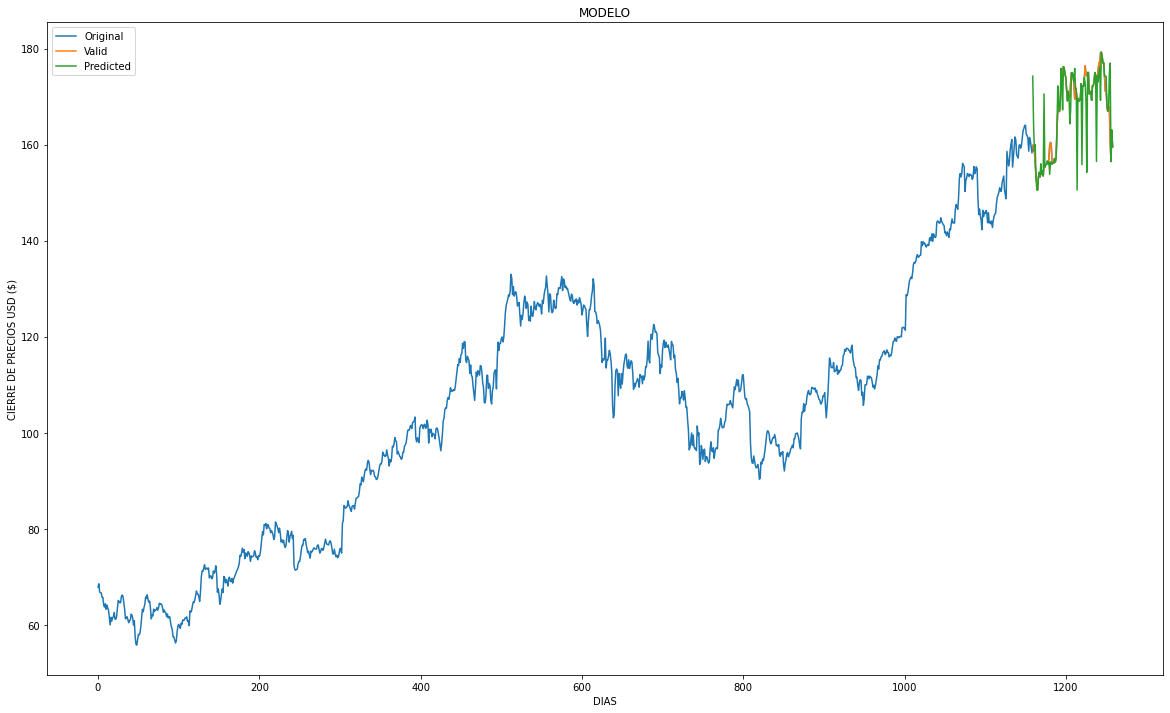

In [24]:
plt.figure(figsize=(20,12))
plt.title("MODELO")
plt.xlabel('DIAS')
plt.ylabel('CIERRE DE PRECIOS USD ($)')
plt.plot(df2['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()

# 2. Uso de libreria KMeans clustering 

Vamos a estudiar paso a paso **la agrupación de K-means** en un ejemplo real. El conjunto de datos que utilicé son los datos de acciones del S&P 500, pero hay 505 acciones diferentes.

**Objetivo**

> Intentar segregar grupos con patrones / comportamientos similares y asignarlos en grupos. La forma en que vamos a definir estos grupos es analizando la variación en el valor de cierre de cada acción.

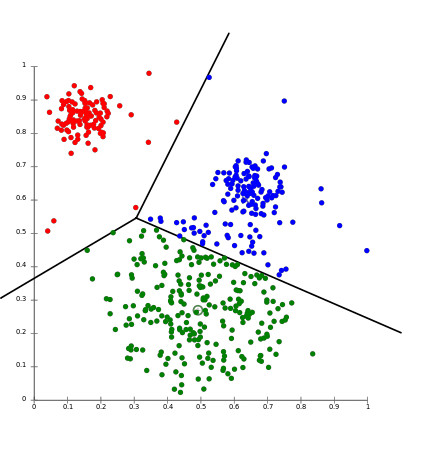

In [128]:
# Importar la ruta csv
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
# Esta configurada para mostrar todas las columnas
pd.set_option('display.max_columns', 505) 

En Kaggle, los datos se cargan en una carpeta llamada individual_stocks_5yr que contiene archivos de datos para acciones individuales, etiquetados por su nombre de cotización de acciones. Por esta razón, primero tengo que escribir todas las rutas donde se encuentran estos csvs y luego "leerlos" (función pandas) para subirlos a un DataFrame. Este DataFrame tendrá una columna para cada Stock (505) con el valor de cierre para cada fecha.

In [129]:
path = 'D:\Carrera\INTELIGENCIA ARTIFICIAL\individual_stocks_5yr'
csvs = [os.path.join(path, file) for file in os.listdir(path) if file.endswith('.csv')]
# Creación de un DataFrame donde vamos a subir los csvs
df = pd.DataFrame() 
    
for file in csvs:
    #Se inicia a leer cada archivo .csv
    stock_df = pd.read_csv(file) 
    
    # Definición de "Fecha" como índice
    stock_df.index = pd.DatetimeIndex(stock_df.date)
    name = stock_df['Name'].iloc[0]
    #Sube solo el valor de cierre.
    df[name] = stock_df['close'] 

df= df.sort_index(axis=1)
# Nuestro nuevo DataFrame
df.describe() 

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,ADP,ADS,ADSK,AEE,AEP,AES,AET,AFL,AGN,AIG,AIV,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALL,ALLE,ALXN,AMAT,AMD,AME,AMG,AMGN,AMP,AMT,AMZN,ANDV,ANSS,ANTM,AON,AOS,APA,APC,APD,APH,APTV,ARE,ARNC,ATVI,AVB,AVGO,AVY,AWK,AXP,AYI,AZO,BA,BAC,BAX,BBT,BBY,BDX,BEN,BF.B,BHF,BHGE,BIIB,BK,BLK,BLL,BMY,BRK.B,BSX,BWA,BXP,C,CA,CAG,CAH,CAT,CB,CBG,CBOE,CBS,CCI,CCL,CDNS,CELG,CERN,CF,CFG,CHD,CHK,CHRW,CHTR,CI,CINF,CL,CLX,CMA,CMCSA,CME,CMG,CMI,CMS,CNC,CNP,COF,COG,COL,COO,COP,COST,COTY,CPB,CRM,CSCO,CSRA,CSX,CTAS,CTL,CTSH,CTXS,CVS,CVX,CXO,D,DAL,DE,DFS,DG,DGX,DHI,DHR,DIS,DISCA,DISCK,DISH,DLR,DLTR,DOV,DPS,DRE,DRI,DTE,DUK,DVA,DVN,DWDP,DXC,EA,EBAY,ECL,ED,EFX,EIX,EL,EMN,EMR,EOG,EQIX,EQR,EQT,ES,ESRX,ESS,ETFC,ETN,ETR,EVHC,EW,EXC,EXPD,EXPE,EXR,F,FAST,FB,FBHS,FCX,FDX,FE,FFIV,FIS,FISV,FITB,FL,FLIR,FLR,FLS,FMC,FOX,FOXA,FRT,FTI,FTV,GD,GE,GGP,GILD,GIS,GLW,GM,GOOG,GOOGL,GPC,GPN,GPS,GRMN,GS,GT,GWW,HAL,HAS,HBAN,HBI,HCA,HCN,HCP,HD,HES,HIG,HII,HLT,HOG,HOLX,HON,HP,HPE,HPQ,HRB,HRL,HRS,HSIC,HST,HSY,HUM,IBM,ICE,IDXX,IFF,ILMN,INCY,INFO,INTC,INTU,IP,IPG,IQV,IR,IRM,ISRG,IT,ITW,IVZ,JBHT,JCI,JEC,JNJ,JNPR,JPM,JWN,K,KEY,KHC,KIM,KLAC,KMB,KMI,KMX,KO,KORS,KR,KSS,KSU,L,LB,LEG,LEN,LH,LKQ,LLL,LLY,LMT,LNC,LNT,LOW,LRCX,LUK,LUV,LYB,M,MA,MAA,MAC,MAR,MAS,MAT,MCD,MCHP,MCK,MCO,MDLZ,MDT,MET,MGM,MHK,MKC,MLM,MMC,MMM,MNST,MO,MON,MOS,MPC,MRK,MRO,MS,MSFT,MSI,MTB,MTD,MU,MYL,NAVI,NBL,NCLH,NDAQ,NEE,NEM,NFLX,NFX,NI,NKE,NLSN,NOC,NOV,NRG,NSC,NTAP,NTRS,NUE,NVDA,NWL,NWS,NWSA,O,OKE,OMC,ORCL,ORLY,OXY,PAYX,PBCT,PCAR,PCG,PCLN,PDCO,PEG,PEP,PFE,PFG,PG,PGR,PH,PHM,PKG,PKI,PLD,PM,PNC,PNR,PNW,PPG,PPL,PRGO,PRU,PSA,PSX,PVH,PWR,PX,PXD,PYPL,QCOM,QRVO,RCL,RE,REG,REGN,RF,RHI,RHT,RJF,RL,RMD,ROK,ROP,ROST,RRC,RSG,RTN,SBAC,SBUX,SCG,SCHW,SEE,SHW,SIG,SJM,SLB,SLG,SNA,SNI,SNPS,SO,SPG,SPGI,SRCL,SRE,STI,STT,STX,STZ,SWK,SWKS,SYF,SYK,SYMC,SYY,T,TAP,TDG,TEL,TGT,TIF,TJX,TMK,TMO,TPR,TRIP,TROW,TRV,TSCO,TSN,TSS,TWX,TXN,TXT,UA,UAA,UAL,UDR,UHS,ULTA,UNH,UNM,UNP,UPS,URI,USB,UTX,V,VAR,VFC,VIAB,VLO,VMC,VNO,VRSK,VRSN,VRTX,VTR,VZ,WAT,WBA,WDC,WEC,WFC,WHR,WLTW,WM,WMB,WMT,WRK,WU,WY,WYN,WYNN,XEC,XEL,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.00000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1063.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.00000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,44.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,143.000000,152.000000,1259.000000,1259.000000,1259.000000,1259.000000,1257.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,850.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1173.000000,1259.000000,1259.000000,1259.000000,561.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1243.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,109.000000,215.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.0

In [130]:
# MAs informacion del data frame
df.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2013-02-08 to 2018-02-07
Columns: 505 entries, A to ZTS
dtypes: float64(505)
memory usage: 4.9 MB


#  Preprosesamiento de datos


In [131]:
# Un poco mas de informacion
df.shape 

(1259, 505)

In [132]:
# Verificando que nuestras columnas sean únicas y que no hayamos subido nombres duplicados de csv.
df.columns.unique()

Index(['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       ...
       'XL', 'XLNX', 'XOM', 'XRAY', 'XRX', 'XYL', 'YUM', 'ZBH', 'ZION', 'ZTS'],
      dtype='object', length=505)

In [133]:
# Cantidad de valores faltantes 
df.isnull().sum().sum() 

16755

In [134]:
# Verificando qué acciones tienen columnas con algún valor faltante
df.columns[df.isnull().any()] 

Index(['ALLE', 'APTV', 'BHF', 'BHGE', 'BMY', 'CFG', 'COTY', 'CSRA', 'DHR',
       'DWDP', 'DXC', 'ES', 'EVHC', 'FOX', 'FOXA', 'FTV', 'GOOG', 'HLT', 'HPE',
       'HPQ', 'ICE', 'INFO', 'IQV', 'KHC', 'NAVI', 'NWS', 'NWSA', 'O', 'ORCL',
       'PYPL', 'QRVO', 'SYF', 'UA', 'WLTW', 'WRK'],
      dtype='object')

In [135]:
#Ejemplo de una acción con valores nulos (NaN)
df['FOX'] 

date
2013-02-08      NaN
2013-02-11      NaN
2013-02-12      NaN
2013-02-13      NaN
2013-02-14      NaN
              ...  
2018-02-01    36.71
2018-02-02    36.22
2018-02-05    35.56
2018-02-06    36.42
2018-02-07    35.70
Name: FOX, Length: 1259, dtype: float64

In [136]:
# Eliminaremos NaN con el promedio
df = df.fillna(df.mean())

In [137]:
#Comprobando si esta función mágica de relleno funcionó ... ¡sí! ;)
df ['FOX']

date
2013-02-08    30.527452
2013-02-11    30.527452
2013-02-12    30.527452
2013-02-13    30.527452
2013-02-14    30.527452
                ...    
2018-02-01    36.710000
2018-02-02    36.220000
2018-02-05    35.560000
2018-02-06    36.420000
2018-02-07    35.700000
Name: FOX, Length: 1259, dtype: float64

In [138]:
# Cantidad de valores faltantes Existentes eran 16755  
df.isnull().sum().sum() 

0

In [139]:
# Selección del último valor de cada mes.
df_month = df.resample('M').last()
df_month.head()
df_month.shape 

(61, 505)

In [140]:
# Selección de 10 acciones al azar para una visualización más fácil.
df2 = df_month[df_month.columns.to_series().sample(10)]
df2

,L,PSX,LLY,IBM,EMN,EQIX,MCD,GPC,MDLZ,VRSN
date,,,,,,,,,,
2013-02-28,43.11,62.96,54.66,200.83,69.73,211.55,95.90,71.03,27.640,45.81
2013-03-31,44.07,69.97,56.79,213.30,69.87,216.31,99.69,78.00,30.615,47.27
2013-04-30,44.67,60.95,55.38,202.54,66.65,214.10,102.14,76.33,31.450,46.07
2013-05-31,45.82,66.57,53.16,208.02,71.72,202.64,96.57,77.74,29.475,47.04
2013-06-30,44.40,58.91,49.12,191.11,70.01,184.72,99.00,78.07,28.530,44.66
...,...,...,...,...,...,...,...,...,...,...
2017-10-31,49.51,91.08,81.94,154.06,90.81,463.50,166.91,88.23,41.430,107.52
2017-11-30,50.28,97.56,84.64,153.97,92.37,464.49,171.97,92.97,42.940,115.10
2017-12-31,50.03,101.15,84.46,153.42,92.64,453.22,172.12,95.01,42.800,114.44


In [141]:
start = df2.iloc[0] 
print(start)
# Cálculo del% de variación entre cada fecha y el valor inicial.
returns = (df2 - start) / start
#returns

L        43.11
PSX      62.96
LLY      54.66
IBM     200.83
EMN      69.73
EQIX    211.55
MCD      95.90
GPC      71.03
MDLZ     27.64
VRSN     45.81
Name: 2013-02-28 00:00:00, dtype: float64


In [142]:
#Eliminación de la primera fila, ya que la variación entre el valor inicial ya que siempre es 0.
returns = returns.iloc[1:,:] 


In [143]:
df_month.shape 

(61, 505)

Text(0.5, 1.0, 'Variación aleatoria de 10 acciones')

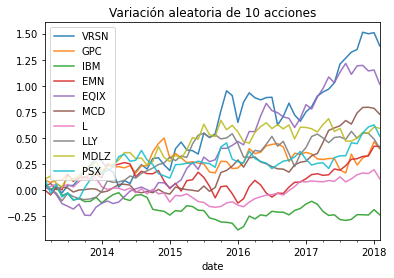

In [144]:
# Definición de una función para graficar.
def plot_stock(name, returns=returns):
    returns[name].plot(label=name, alpha=0.9);
    # Selección aleatoria de 10 acciones
returns_sample = returns[returns.columns.to_series().sample(10)] 
# El vector con el nombre de las acciones que fueron seleccionadas al azar
returns_sample_name = returns_sample.columns 

n=0
while n < 10: 
    plot_stock(returns_sample_name[n])
    n=n+1

plt.legend()
plt.title('Variación aleatoria de 10 acciones')

### Uso de KMeans

Para la elección del número de agrupaciones basé mi decisión en el método del codo. La idea de este método es ejecutar la agrupación de k-medias en el conjunto de datos para un rango de valores de k (apliqué de 1 a 20), y para cada valor de k calcular la suma de distancias al cuadrado. Si el gráfico de líneas cuando se visualiza parece un brazo, entonces el "codo" en el brazo es el valor de k que es el mejor.

In [145]:
from sklearn.cluster import KMeans

suma_cuadrada = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters=k)
    # No nos permite que nos olvidemos de transponer el dataFrame
    km = km.fit(returns.T)
    suma_cuadrada.append(km.inertia_)

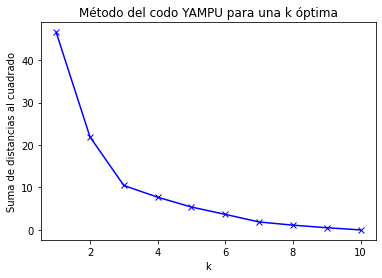

In [146]:
plt.plot(K, suma_cuadrada, 'bx-')
plt.xlabel('k')
plt.ylabel('Suma de distancias al cuadrado')
plt.title('Método del codo YAMPU para una k óptima')
plt.show()

In [147]:
#La "K" óptima que está en el "Codo de Yampu" de la trama es 4. 
kmeans = KMeans(n_clusters=4, random_state=505).fit(returns.T);

In [148]:
#Se ha hecho la magia de K-means, ahora tenemos que visualizar los diferentes grupos.
clusters = {}
for l in np.unique(kmeans.labels_):
    clusters[l] = []

for i,l in enumerate(kmeans.predict(returns.T)):
    clusters[l].append(returns.columns[i])
for c in sorted(clusters):
    print('Cluster ' + str(c) + ': ', end='')
    for symbol in clusters[c]:
        print(symbol, end=' , ')
    print()
    print()

Cluster 0: PSX , LLY , MCD , GPC , MDLZ , 

Cluster 1: EQIX , VRSN , 

Cluster 2: IBM , 

Cluster 3: L , EMN , 



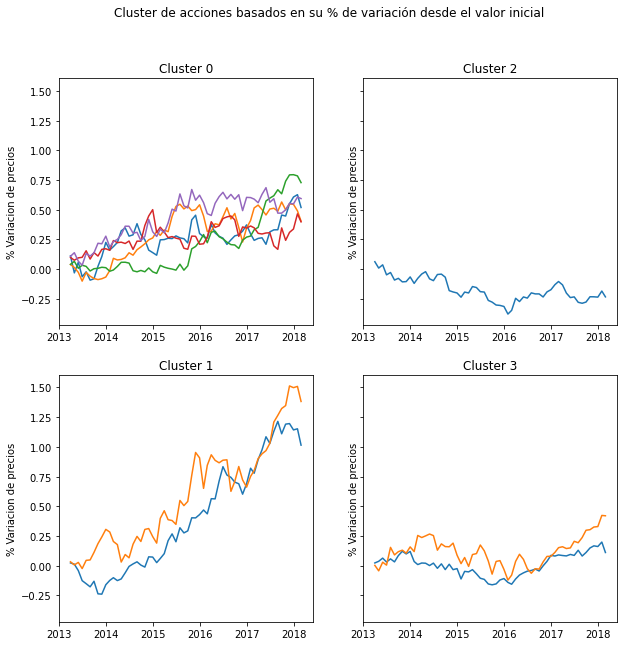

In [149]:
fig, axs = plt.subplots(2, 2,  sharey=True, figsize=(10, 10))
fig.suptitle('Cluster de acciones basados en su % de variación desde el valor inicial')
#plt.ylabel('Variacion de precio de las acciones')
axs[0, 0].plot(returns[clusters[0]])
axs[0, 0].set_title('Cluster 0')
axs[1, 0].plot(returns[clusters[1]])
axs[1, 0].set_title('Cluster 1')
axs[0, 1].plot(returns[clusters[2]])
axs[0, 1].set_title('Cluster 2')
axs[1, 1].plot(returns[clusters[3]])
axs[1, 1].set_title('Cluster 3')

for ax in axs.flat:
    ax.set(ylabel='% Variacion de precios')

plt.show()